#**Problem Statement:**
The purpose of this study is to build a machine learning model that can predict the price of the Bangalorer house using their features. 

#**Import Basic Libraries**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing the CSV file**

In [2]:
# Load dataset 
data_set = pd.read_csv("Bengaluru_House_Data.csv")

# **Analysing the Data**

In [3]:
# get the information of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
data_set.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


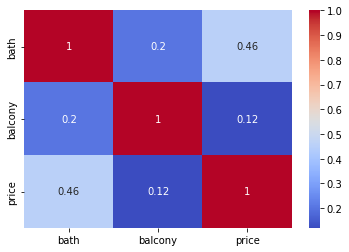

In [6]:
# correlation heatmap
num_vars = ["bath", "balcony", "price"]
sns.heatmap(data_set[num_vars].corr(),cmap="coolwarm", annot=True)

# **Data Cleaning & Missing value Treatment**
**Data cleaning**

In [7]:
data_set.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

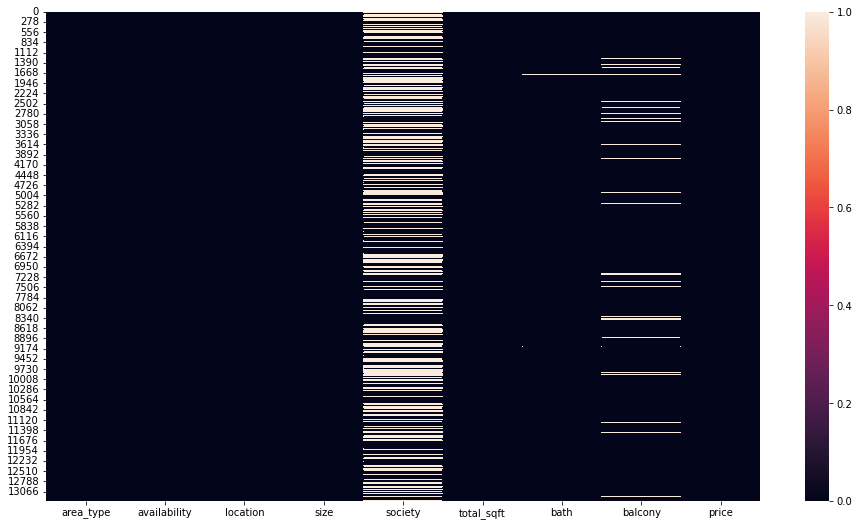

In [8]:
# visualize missing value using heatmap to get idea where is the value missing
 
plt.figure(figsize=(16,9))
sns.heatmap(data_set.isnull())

In [9]:
data_set.isnull().mean()*100 # % of measing value

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

**Null Value Treatment**

In [12]:
# Drop ----------> society feature because 41.3% missing value
data_set = data_set.drop('society', axis=1)
data_set.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [18]:
data_set['balcony'].mode()

0    2.0
dtype: float64

In [21]:
# fill mode value in --------> balcony feature because it contain 4.5% missing value
data_set['balcony'].fillna(2, inplace= True)
data_set.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [23]:
data_set['size'].mode()

0    2 BHK
dtype: object

In [24]:
data_set['size'].fillna('2 BHK', inplace=True)
data_set.isnull().sum()

area_type        0
availability     0
location         1
size             0
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [25]:
data_set['bath'].mode()

0    2.0
dtype: float64

In [26]:
data_set['bath'].fillna(2, inplace=True)
data_set.isnull().sum()

area_type       0
availability    0
location        1
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
data_set['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [27]:
data_set['location'].fillna('Sarjapur  Road', inplace= True)
data_set.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

# **Data Manipulation and Exploratory Data Analysis**

In [28]:
# Converting 'total_sqft' cat feature in numeric 
data_set['total_sqft'].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [29]:
data_set['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
# here we observe that 'total_sqft' contain string value in diff format float, int values range values like 540 - 740 number and Sq. Meter, Sq. Yards, Grounds

# so convert it into number by spliting it

In [31]:
def convert_sqft_to_num(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None  
     

In [32]:
data_set["total_sqft_int"]= data_set["total_sqft"].apply(convert_sqft_to_num)

In [33]:
data_set.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [34]:
data_set.isna().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [35]:
# drop na value
data_set = data_set.dropna()
data_set.shape

(13274, 9)

In [36]:
# Working on 'Size'  feature 
data_set['size'].value_counts()

2 BHK         5209
3 BHK         4301
4 Bedroom      824
4 BHK          588
3 Bedroom      542
1 BHK          534
2 Bedroom      325
5 Bedroom      294
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           58
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [37]:
# size feature shows the number of rooms in different format, so takes only number and remove the text part
data_set['size']= data_set['size'].apply(lambda x : float(x.split(' ')[0]))

In [38]:
data_set.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00,1200.0


In [39]:
data_set.isna().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
total_sqft_int    0
dtype: int64

Feature Engineering

Finding Outlier and Removing

In [40]:
# create new feature that is price per squre foot it help to find the outliers 
# price in lakh so conver into rupee and then / by total_sqft_int
data_set['price_per_sqft'] = data_set['price']*100000 / data_set['total_sqft_int']  
data_set.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00,1200.0,4250.000000


In [45]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and the variable of interest as arguments
 
    # define figure size
    plt.figure(figsize=(10, 4))
 
    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
 
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
 
    plt.show()

******* bath *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


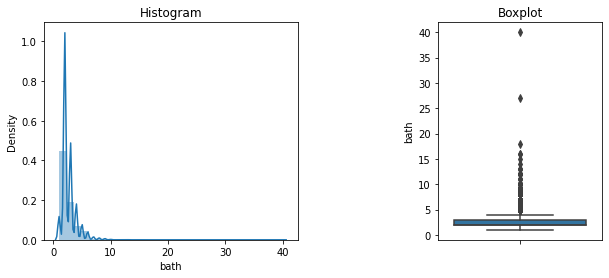

******* balcony *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


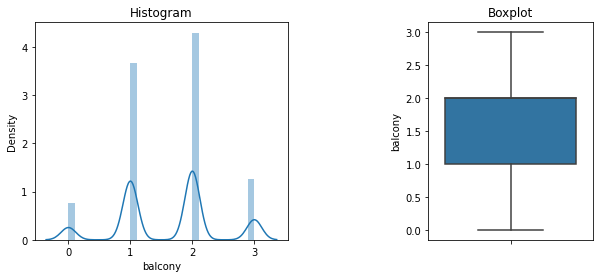

******* total_sqft_int *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


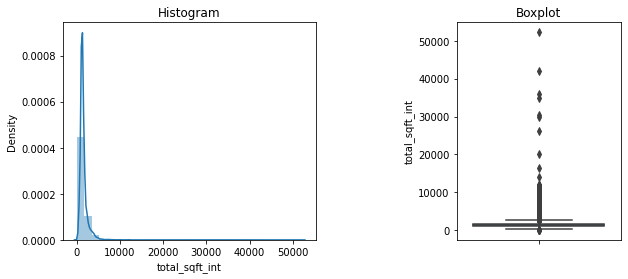

******* size *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


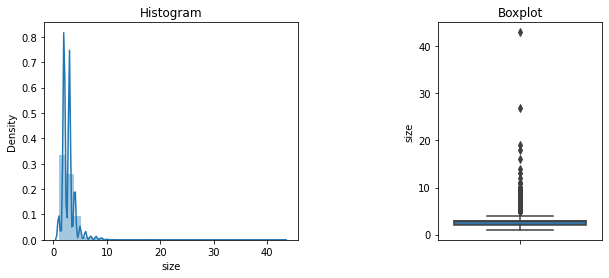

******* price *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


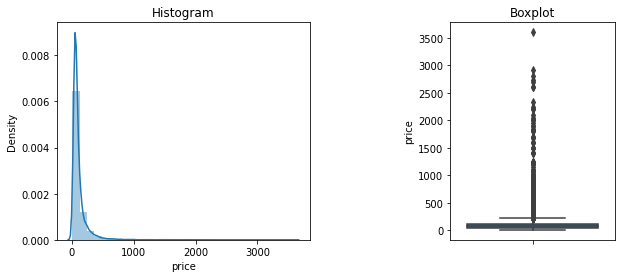

In [46]:
num_var = ["bath","balcony","total_sqft_int","size","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(data_set, var)

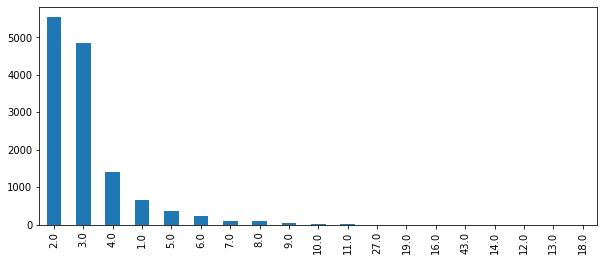

In [49]:
plt.figure(figsize=(10, 4))
data_set['size'].value_counts().plot(kind='bar')
plt.show()

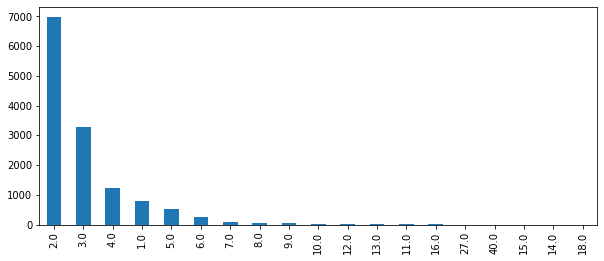

In [59]:
plt.figure(figsize=(10, 4))
data_set['bath'].value_counts().plot(kind='bar')
plt.show()

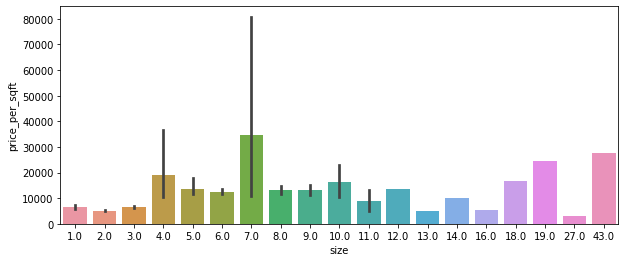

In [54]:
plt.figure(figsize=(10,4))
sns.barplot(x='size',y='price_per_sqft', data= data_set)
plt.show()

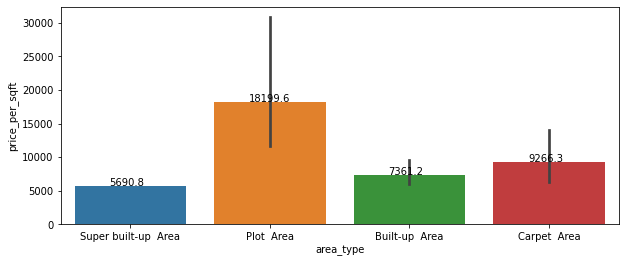

In [58]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x='area_type',y='price_per_sqft', data= data_set)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [62]:
data_set[data_set['size']>20]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,price_per_sqft
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27.0,8000,27.0,0.0,230.0,8000.0,2875.0
4684,Plot Area,Ready To Move,Munnekollal,43.0,2400,40.0,0.0,660.0,2400.0,27500.0


In [63]:
data_set[data_set['bath']>20]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,price_per_sqft
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27.0,8000,27.0,0.0,230.0,8000.0,2875.0
4684,Plot Area,Ready To Move,Munnekollal,43.0,2400,40.0,0.0,660.0,2400.0,27500.0


Outlier Removal Using Business Logic

Normally square ft per bedroom is 300 , 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier.

In [79]:
data_set[data_set['total_sqft_int']/data_set['size'] < 300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,price_per_sqft
9,Plot Area,Ready To Move,other,6.0,1020,6.0,2.0,370.0,1020.0,36274.509804
45,Plot Area,Ready To Move,HSR Layout,8.0,600,9.0,2.0,200.0,600.0,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,6.0,1407,4.0,1.0,150.0,1407.0,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8.0,1350,7.0,0.0,85.0,1350.0,6296.296296
70,Plot Area,Ready To Move,other,3.0,500,3.0,2.0,100.0,500.0,20000.000000


In [66]:
data_set.shape

(13274, 10)

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [68]:
data_set['location']= data_set['location'].apply(lambda x : x.strip())
data_set['location'].value_counts()

Whitefield                        539
Sarjapur  Road                    400
Electronic City                   304
Kanakpura Road                    271
Thanisandra                       236
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1288, dtype: int64

In [69]:
len(data_set['location'].value_counts()[data_set['location'].value_counts()<=10])

1048

**Dimensionality Reduction**

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [70]:
loc_count=data_set['location'].value_counts()

In [71]:
location_other = loc_count[loc_count<=10]
location_other

Sadashiva Nagar                   10
BTM 1st Stage                     10
Nagadevanahalli                   10
Sector 1 HSR Layout               10
Basapura                          10
                                  ..
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Kannur                             1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1048, dtype: int64

In [72]:
data_set.location = data_set.location.apply(lambda x: 'other' if x in location_other else x)

In [73]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13274 non-null  object 
 1   availability    13274 non-null  object 
 2   location        13274 non-null  object 
 3   size            13274 non-null  float64
 4   total_sqft      13274 non-null  object 
 5   bath            13274 non-null  float64
 6   balcony         13274 non-null  float64
 7   price           13274 non-null  float64
 8   total_sqft_int  13274 non-null  float64
 9   price_per_sqft  13274 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.6+ MB


In [74]:
data_set.shape

(13274, 10)

In [65]:
data_set.price_per_sqft.describe()

count    1.327400e+04
mean     7.907501e+03
std      1.064296e+05
min      2.678298e+02
25%      4.266865e+03
50%      5.434306e+03
75%      7.311746e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [103]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df['size']==2)]
  bhk3 = df[(df.location==location) & (df['size']==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

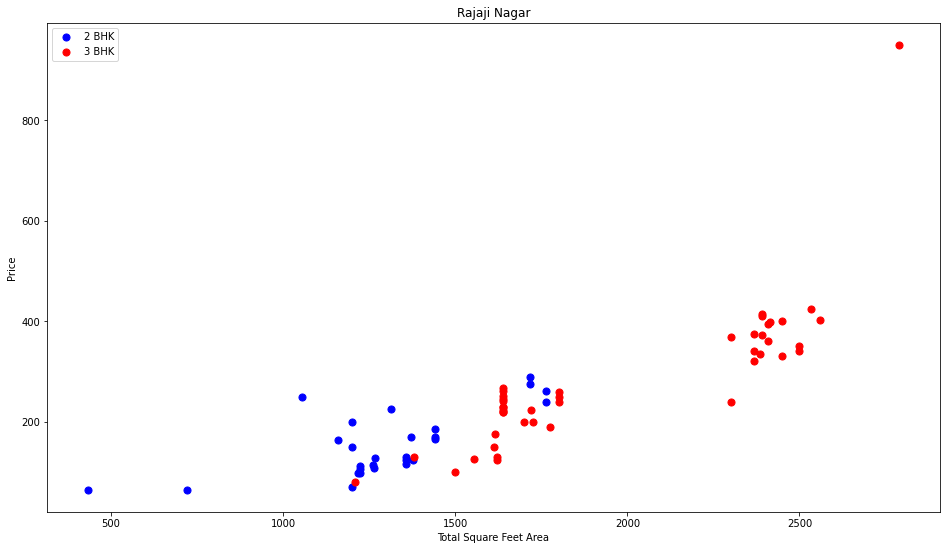

In [104]:
plot_scatter_chart(data_set, "Rajaji Nagar")

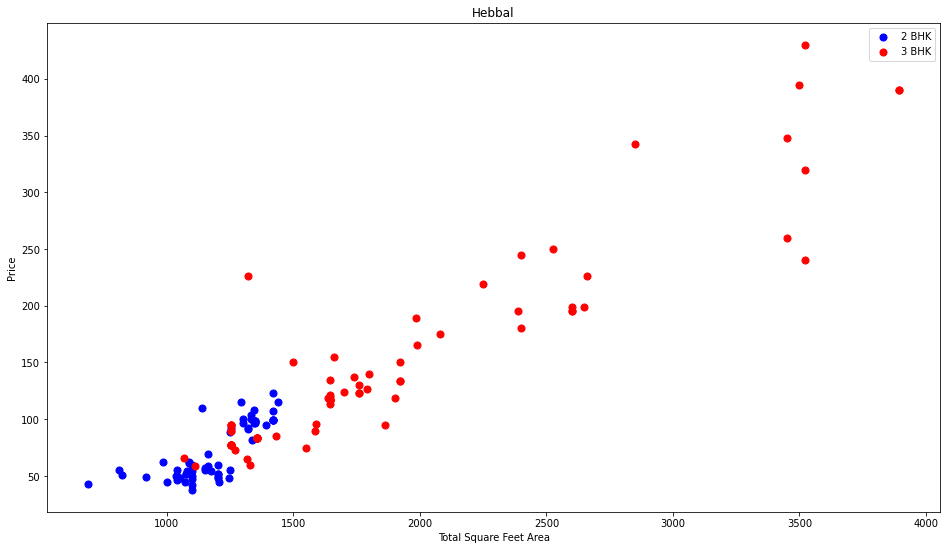

In [105]:
# in above scatterplot we observe that at same location price of 2 bhk house is greater than 3 bhk so it is outlier
 
plot_scatter_chart(data_set, "Hebbal")
# in below scatterplot we observe that at same location price of 3 bhk house is less than 2 bhk so it is outlier

Outlier Removal Using Bathrooms Feature

In [106]:
# Remove outliers using the help of 'bath' feature
 
data_set.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

It is unusual to have 2 more bathrooms than number of bedrooms in a home, so we are considering data only total no. bathroom =  bhk + 1

In [108]:
# here we are considering data only total no. bathroom =  bhk + 1
data_set[data_set.bath > data_set['size'] +2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,price_per_sqft
1078,Plot Area,Ready To Move,other,9.0,3300,14.0,2.0,500.0,3300.0,15151.515152
1953,Plot Area,Ready To Move,KR Puram,8.0,1200,12.0,2.0,110.0,1200.0,9166.666667
1979,Plot Area,Ready To Move,other,8.0,990,12.0,0.0,120.0,990.0,12121.212121
2620,Super built-up Area,Ready To Move,other,6.0,11338,9.0,1.0,1000.0,11338.0,8819.897689
6838,Super built-up Area,19-Jan,Rajaji Nagar,5.0,7500,8.0,3.0,1700.0,7500.0,22666.666667
6937,Plot Area,Ready To Move,5th Block Hbr Layout,9.0,2600,12.0,2.0,675.0,2600.0,25961.538462
7709,Built-up Area,Ready To Move,Chikkabanavar,4.0,2460,7.0,2.0,80.0,2460.0,3252.032520
8106,Plot Area,Ready To Move,other,8.0,1850,12.0,2.0,300.0,1850.0,16216.216216
9974,Plot Area,Ready To Move,other,3.0,2400,6.0,2.0,775.0,2400.0,32291.666667
9990,Plot Area,Ready To Move,other,6.0,1200,9.0,3.0,122.0,1200.0,10166.666667


In [109]:
data_set.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00,1200.0,4250.000000


In [110]:
data_set = data_set.drop(['area_type', 'availability',"price_per_sqft",'total_sqft'], axis =1)
data_set.head()

,location,size,bath,balcony,price,total_sqft_int
0,Electronic City Phase II,2.0,2.0,1.0,39.07,1056.0
1,Chikka Tirupathi,4.0,5.0,3.0,120.00,2600.0
2,Uttarahalli,3.0,2.0,3.0,62.00,1440.0
3,Lingadheeranahalli,3.0,3.0,1.0,95.00,1521.0
4,Kothanur,2.0,2.0,1.0,51.00,1200.0


# **Encoding the categorical Data**
Use One Hot Encoding For Location

In [111]:
dummies = pd.get_dummies(data_set.location)

In [112]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
data_set = pd.concat([data_set,dummies.drop('other',axis=1)],axis=1)

In [115]:
data_set = data_set.drop('location',axis=1)

In [116]:
data_set.shape

(13274, 245)

We are good to build a model now.

#**Splitting data for training and testing**

In [117]:
x = data_set.drop(['price'],axis=1)
y = data_set['price']
print(x.shape)
print(y.shape)

(13274, 244)
(13274,)


In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# **Feature Scaling**
**StandardScaler** comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure. StandardScaler removes the mean and scales the data to the unit variance

In [119]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit_transform(x_train)

array([[-1.41568661, -1.29121053, -1.99848478, ..., -0.04954242,
        -0.03220176, -0.08087202],
       [ 0.96009848,  1.02307403,  0.49088881, ..., -0.04954242,
        -0.03220176, -0.08087202],
       [-0.62375825, -0.51978234,  0.49088881, ..., -0.04954242,
        -0.03220176, -0.08087202],
       ...,
       [ 0.96009848, -0.51978234,  0.49088881, ..., -0.04954242,
        -0.03220176, -0.08087202],
       [ 0.96009848, -0.51978234, -0.75379798, ..., -0.04954242,
        -0.03220176, -0.08087202],
       [ 0.16817012, -0.51978234, -0.75379798, ..., -0.04954242,
        -0.03220176, -0.08087202]])

#**Applying Algorithms**

In [120]:
# applying linear Regreassion
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.4538236898212048

In [121]:
# applying DecisionTree algo
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.35482532424777957

In [122]:
# applying random Forest algo
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

0.518844923248841

In [123]:
# applying KNN Algo
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn.score(x_test,y_test)

0.4491146704332666

# **Feature Selection**

In [124]:
rfr.feature_importances_

array([5.42031289e-02, 8.60487015e-02, 3.65052607e-02, 6.86215370e-01,
       3.39396012e-04, 3.86866056e-04, 1.24715240e-05, 5.81738068e-04,
       1.22060367e-04, 4.11428461e-04, 8.36806271e-05, 5.73880023e-04,
       3.06525107e-04, 1.74574442e-04, 1.57375660e-05, 6.22745643e-05,
       1.10593160e-04, 1.15457681e-04, 3.36502220e-04, 2.91822266e-05,
       2.63661507e-05, 6.84705709e-05, 1.36100544e-04, 9.96458842e-05,
       1.89163190e-04, 8.90692564e-05, 1.14977445e-04, 2.19272447e-04,
       7.47374765e-04, 5.20530986e-05, 1.76045676e-05, 5.92982153e-06,
       2.28077869e-05, 8.03873554e-04, 6.68488240e-04, 5.85966928e-03,
       6.30134237e-05, 4.17171568e-04, 3.43606176e-04, 1.49665944e-05,
       4.23727671e-05, 6.85613014e-04, 4.05704603e-04, 5.56057095e-04,
       1.25978013e-04, 2.02306616e-04, 9.33163193e-05, 2.86341750e-04,
       1.89891469e-03, 3.80866108e-06, 6.24350079e-05, 3.39802582e-05,
       1.95583606e-04, 2.83224715e-05, 5.28924135e-05, 4.49374665e-05,
      

In [127]:
x1=pd.DataFrame(rfr.feature_importances_,columns=["Scores"])
x2=pd.DataFrame(x_train.columns,columns=["Names"])
score_rfc=pd.concat([x2,x1],axis=1)
score_rfc.sort_values("Scores",ascending=False).head(10)

,Names,Scores
3,total_sqft_int,0.686215
1,bath,0.086049
0,size,0.054203
2,balcony,0.036505
57,Bommenahalli,0.013885
199,Rajaji Nagar,0.007489
70,Cunningham Road,0.007378
155,Kothanur,0.007145
208,Sarjapur Road,0.006966
169,Malleshwaram,0.006418


In [130]:
x = data_set[['total_sqft_int','bath','size','balcony']]
y = data_set['price']
print(x.shape)
print(y.shape)

(13274, 4)
(13274,)


In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [132]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit_transform(x_train)

array([[-0.64105678, -1.29121053, -1.41568661, -1.99848478],
       [ 1.867824  ,  1.02307403,  0.96009848,  0.49088881],
       [-0.49573112, -0.51978234, -0.62375825,  0.49088881],
       ...,
       [ 0.55107379, -0.51978234,  0.96009848,  0.49088881],
       [ 0.33404391, -0.51978234,  0.96009848, -0.75379798],
       [-0.20277912, -0.51978234,  0.16817012, -0.75379798]])

In [133]:
# applying linear Regreassion
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.41079288886859733

In [134]:
# applying DecisionTree algo
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.29790397146689607

In [135]:
# applying random Forest algo
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

0.47974733673626735

In [136]:
# applying KNN Algo
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn.score(x_test,y_test)

0.45608939272989246

#**Conclusio**n
After applying feature reduction based on the feature importance, the score is not improving. So we need to remove all the outliers and apply the algorithms again.